In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
#defining functions used later in the code

def preprocess(dataframe):
    dataframe.created_at = pd.to_datetime(dataframe.created_at,
                                          format='%Y-%m-%d %H:%M:%S')
    dataframe.fillna(np.nan) 

def conditions(s):
    if (s['result_doc'] == 'clear') and (s['result_face'] == 'clear'):
        return 'pass'
    else:
        return 'fail'

def encoder(columns, dataset):
    for column in columns:
        dataset[column] = dataset[column].map(my_mapper)
        
 
my_mapper = {"clear": 0, "pass":0 , 'unidentified': 1, "consider" : 1, "fail":1}

map_encode_all = ['result_doc', 
                  'result',
                  "visual_authenticity_result_doc", 
                  "image_integrity_result",                   
                  'police_record_result', 
                  'compromised_document_result',
                  "face_detection_result", 
                  "image_quality_result",
                  "supported_document_result",
                  'conclusive_document_quality_result',
                  'colour_picture_result', 
                  'data_validation_result',
                  'data_consistency_result', 
                  'data_comparison_result',
                  'face_comparison_result', 
                  'facial_image_integrity_result',
                  'visual_authenticity_result_face',
                  'result_face']

document_features = [
                     'visual_authenticity_result_doc', 
                     'image_integrity_result',
                     'face_detection_result',
                     'image_quality_result',
                     'created_at_doc',
                     'supported_document_result',
                     'conclusive_document_quality_result',
                     'colour_picture_result', 
                     'data_validation_result',
                     'data_consistency_result', 
                     'data_comparison_result', 
                     'attempt_id',
                     'police_record_result', 
                     'compromised_document_result']

face_check_feature = [ 
                      'face_comparison_result',
                      'facial_image_integrity_result',
                      'visual_authenticity_result_face']

In [3]:
doc_reports = pd.read_csv("doc_reports.csv")
preprocess(doc_reports)
print(doc_reports.shape)

facial_similarity_reports = pd.read_csv("facial_similarity_reports.csv")
preprocess(facial_similarity_reports)
print(facial_similarity_reports.shape)

(176404, 19)
(176404, 9)


In [4]:
print(doc_reports.columns)
doc_reports.head()

Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result'],
      dtype='object')


,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [5]:
print(facial_similarity_reports.columns)
facial_similarity_reports.head()

Index(['Unnamed: 0', 'user_id', 'result', 'face_comparison_result',
       'created_at', 'facial_image_integrity_result',
       'visual_authenticity_result', 'properties', 'attempt_id'],
      dtype='object')


,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [6]:
data = pd.merge(doc_reports, facial_similarity_reports, on='attempt_id',
                                how='left', suffixes=('_doc', '_face'))
data['dummy'] = 1

data = data.drop([ 'user_id_face',  'created_at_face', 'sub_result', 'properties_face', 'Unnamed: 0_face'], axis=1)
data.dropna(subset = ["result_doc", "result_face"], inplace=True)

In [7]:
data['result'] = data.apply(conditions, axis =1)
data['month'] = pd.DatetimeIndex(data['created_at_doc']).month

In [8]:
data.month.unique()

array([ 6,  5,  8, 10,  7,  9])

In [9]:
data.columns

Index(['Unnamed: 0_doc', 'user_id_doc', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result', 'properties_doc',
       'result_face', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_face',
       'dummy', 'result', 'month'],
      dtype='object')

# Plots


In [10]:
joining = data.groupby(pd.Grouper(key='created_at_doc', freq='M'))['user_id_doc'].count().reset_index()
joining['month'] = pd.DatetimeIndex(joining['created_at_doc']).month

joining

,created_at_doc,user_id_doc,month
0,2017-05-31 00:00:00+00:00,1739,5
1,2017-06-30 00:00:00+00:00,8276,6
2,2017-07-31 00:00:00+00:00,33997,7
3,2017-08-31 00:00:00+00:00,36839,8
4,2017-09-30 00:00:00+00:00,37594,9
5,2017-10-31 00:00:00+00:00,57957,10


In [11]:
pass_rate = data[['month', 'result', 'dummy']].groupby(['month', 'result'])['dummy'].apply(lambda x : x.astype(int).sum())
pass_rate = pass_rate.reset_index()
pass_rate = pass_rate.pivot(index='result', columns='month', values='dummy')
pass_rate = pass_rate.T
pass_rate['total'] = pass_rate.sum(axis=1)
pass_rate['percentage_pass'] = pass_rate['pass']/pass_rate['total']
pass_rate = pass_rate.reset_index()

In [12]:
pass_rate

result,month,fail,pass,total,percentage_pass
0,5,334,1405,1739,0.807936
1,6,695,7581,8276,0.916022
2,7,5533,28464,33997,0.837250
3,8,7563,29276,36839,0.794701
4,9,11038,26556,37594,0.706389
5,10,24350,33607,57957,0.579861


## 1)New customers, pass rate

Text(0, 0.5, "Percentage 'pass rate'")

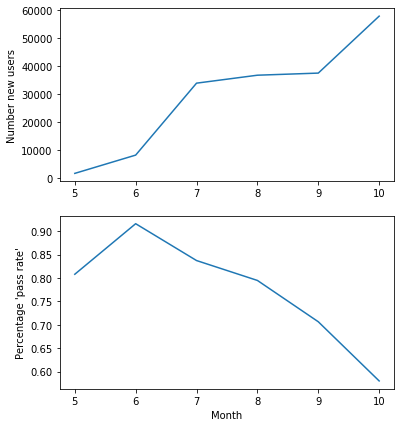

In [13]:
plt.rcParams['figure.figsize'] = (6, 7)
fig, (ax1, ax2) = plt.subplots(2)
plt.rcParams['figure.figsize'] = (20,30)

ax1.plot('month', 'user_id_doc', data = joining)
ax2.plot( 'month', 'percentage_pass', data=pass_rate)

ax1.set_ylabel("Number new users")
ax2.set_xlabel("Month")
ax2.set_ylabel("Percentage 'pass rate'")


In [14]:
fail_doc_face = data[data['result'] == 'fail']

fail_doc= fail_doc_face[['month', 'result_doc', 'dummy']].groupby(['month', 'result_doc'])['dummy'].apply(lambda x : x.astype(int).sum())
fail_doc = fail_doc.reset_index()
fail_doc = fail_doc.pivot(index='result_doc', columns='month', values='dummy')
fail_doc = fail_doc.T.reset_index()

fail_face= fail_doc_face[['month', 'result_face', 'dummy']].groupby(['month', 'result_face'])['dummy'].apply(lambda x : x.astype(int).sum())
fail_face = fail_face.reset_index()
ffail_face = fail_face.pivot(index='result_face', columns='month', values='dummy')
fail_face = ffail_face.T.reset_index()

fail_face.rename({'month': 'month_face', 'clear': 'clear_face', 'consider': 'Facial Similarity - consider'}, axis=1, inplace=True)
fail_doc.rename({'month': 'month_doc', 'clear': 'clear_doc', 'consider': 'Document check - consider'}, axis=1, inplace=True)

join = pd.concat([fail_face, fail_doc], axis=1, join='inner')

join.head(100)

,month_face,clear_face,Facial Similarity - consider,month_doc,clear_doc,Document check - consider
0,5,110,224,5,203,131
1,6,248,447,6,422,273
2,7,2799,2734,7,1807,3726
3,8,4457,3106,8,1634,5929
4,9,8860,2178,9,773,10265
5,10,22122,2228,10,672,23678


Text(0, 0.5, 'Number of considered')

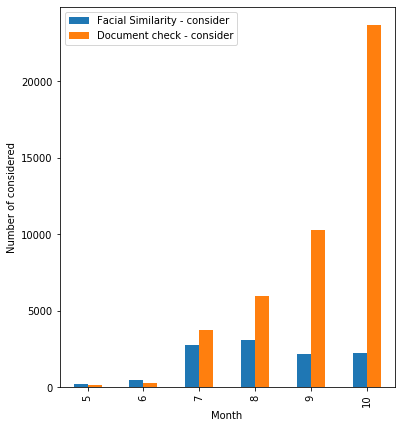

In [15]:
plt.rcParams['figure.figsize'] = (6, 7)
plotdata = join[['month_face', 'Facial Similarity - consider', 'Document check - consider']]
plotdata = plotdata.set_index('month_face')

plotdata.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of considered")

## 

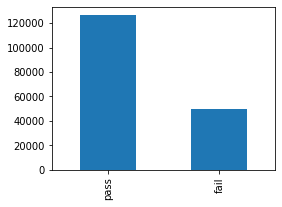

In [16]:
plt.rcParams['figure.figsize'] = (4, 3)
data.result.value_counts().plot.bar();

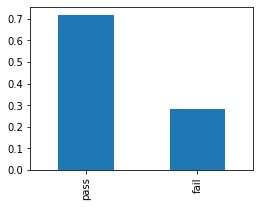

In [17]:
plt.rcParams['figure.figsize'] = (4, 3)
data.result.value_counts(normalize=True).plot.bar();

In [18]:
counts = data.result.value_counts()

In [19]:
counts

pass    126889
fail     49513
Name: result, dtype: int64

In [20]:
print(f'The overall pass rate is {counts[0]/(counts[0]+counts[1])}')

The overall pass rate is 0.7193172413011191


# Analysis

In [21]:
map_encode_all = ['result_doc', 
                  'result',
                  "visual_authenticity_result_doc", 
                  "image_integrity_result",                   
                  'police_record_result', 
                  'compromised_document_result',
                  "face_detection_result", 
                  "image_quality_result",
                  "supported_document_result",
                  'conclusive_document_quality_result',
                  'colour_picture_result', 
                  'data_validation_result',
                  'data_consistency_result', 
                  'data_comparison_result',
                  'face_comparison_result', 
                  'facial_image_integrity_result',
                  'visual_authenticity_result_face',
                  'result_face']


encoder(map_encode_all, data)
data.fillna(0, inplace=True)

In [22]:
data.properties_doc = data.properties_doc.apply(lambda row: row.replace('None', "\"NaN\""))
data['properties_doc'] = data.properties_doc.apply(lambda x: x.strip("\'<>()").replace('\'', '\"'))
data['properties_doc'] = data['properties_doc'].apply(json.loads, strict=False)
data = data.drop('properties_doc', 1).assign(**pd.DataFrame(data.properties_doc.values.tolist()))
data.date_of_expiry = pd.to_datetime(data.date_of_expiry, errors='coerce', format='%Y-%m-%d')
data.issuing_date = pd.to_datetime(data.issuing_date, errors='coerce', format='%Y-%m')

# 1) Document check

# Document check has the highest correlation with image_integrity_result.


image_integrity_result = Asserts whether the document was of sufficient quality to verify

The document report combines software and an expert team to maximise fraud detection. The majority of documents will be processed instantly. However, when document analysis falls back to expert review, the report status will be delivered asynchronously via webhook notifications.

Expert review is required when we encounter images that use sophisticated counterfeiting techniques, or the image is of poor quality (blurred, low resolution, obscured, cropped, or held at an unreadable angle).

result_doc high corr:image_integrity_result , image_quality_result , conclusive_document_quality_result

image_integrity_result: result_doc, image_quality_result  , conclusive_document_quality_result :ult_doc,age_integrity_result         

Asserts whether visual, non-textual, elements are correct given the type of document

A result of clear in the conclusive_document_quality breakdown of image_integrity will assert if the document was of enough quality to be able to perform a fraud inspection. A result of consider will mean that even if sub breakdowns of visual_authenticity fail, we cannot positively say the document is fraudulent or not (in cases such as parts of the document are not visible).

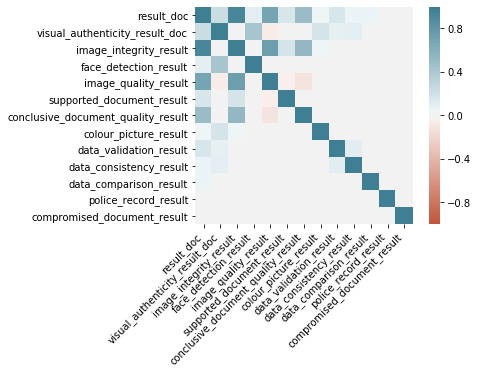

In [23]:
plt.rcParams['figure.figsize'] = (6, 4)

corr = data[[ 'user_id_doc', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/Users/dumitrescucristian/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0, 0.5, 'Count')

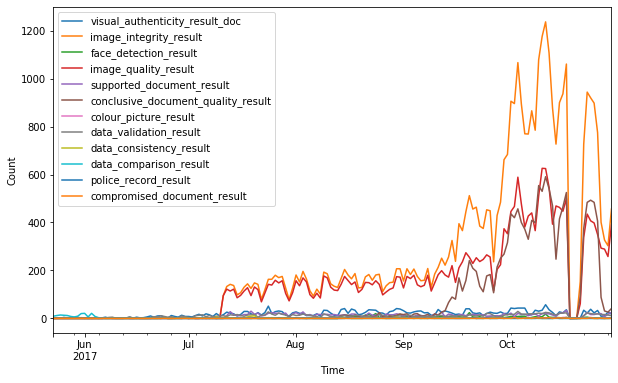

In [24]:
plt.rcParams['figure.figsize'] = (10, 6)
data.iloc[:, 0:17].groupby(pd.Grouper(key='created_at_doc', freq='D'))[document_features].sum().plot();

plt.xlabel("Time")
plt.ylabel("Count")

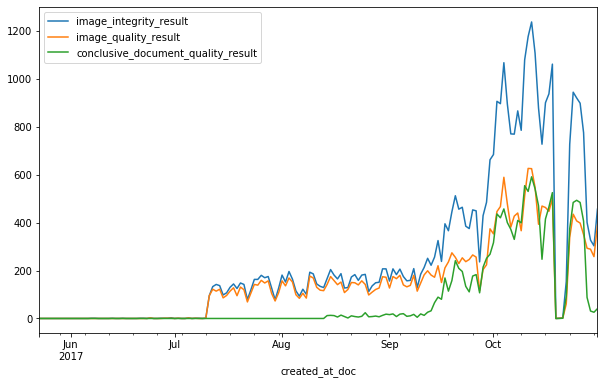

In [25]:
suspected_params = ['image_integrity_result', 'image_quality_result', 'conclusive_document_quality_result']

data.groupby(pd.Grouper(key='created_at_doc', freq='D'))[suspected_params].sum().plot();

In [26]:
x = data[[ 'user_id_doc', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result', 'dummy']]

x = x[['result_doc', 'dummy']].groupby(['result_doc'])['dummy'].apply(lambda x : x.astype(int).sum())
x

result_doc
0    132400
1     44002
Name: dummy, dtype: int64

In [27]:
data_doc = data[[ 'user_id_doc', 'result_doc',
       'visual_authenticity_result_doc', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_doc',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id',
       'police_record_result', 'compromised_document_result', 'dummy']]

In [28]:
data_doc.shape

(176402, 17)

In [29]:
data_doc = data_doc[data_doc['result_doc'] == 1]
data_doc.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,dummy
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57+00:00,0.0,0.0,0.0,0.0,0.0,0.0,050a0596de424fab83c433eaa18b3f8d,0.0,0.0,1
25,18b3422213bf4fd991c7e1736504def2,1,1.0,0.0,0.0,0.0,2017-06-20 19:47:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0,93bb751f9e894b13a3f4c1dac27b6847,0.0,0.0,1
74,86b944b5d9524e20a39c3403700d26a2,1,1.0,0.0,0.0,0.0,2017-06-20 13:17:06+00:00,0.0,0.0,0.0,1.0,1.0,0.0,60e22a5ae68140939a16a946c270da2c,0.0,0.0,1
79,df16b565b6b644a3aa4ea3bdd34f3663,1,1.0,0.0,0.0,0.0,2017-06-20 13:46:39+00:00,0.0,0.0,0.0,0.0,0.0,0.0,82fc82a5d3ba4a1ebeea9b1004a4d654,0.0,0.0,1
88,0dda8fb68b2a481ba370ba27d0678317,1,1.0,0.0,0.0,0.0,2017-06-20 14:09:07+00:00,0.0,0.0,0.0,1.0,0.0,0.0,d8aea86df776486b9823191cc9574e6d,0.0,0.0,1


In [30]:
data_doc_integrity = data_doc[['conclusive_document_quality_result', 'image_integrity_result', 'dummy']].groupby(['image_integrity_result', 'conclusive_document_quality_result'])['dummy'].apply(lambda x : x.astype(int).sum())
data_doc_integrity = data_doc_integrity.reset_index()
#data_doc_integrity = data_doc_integrity.pivot(index='conclusive_document_quality_result', columns='image_integrity_result', values='dummy')
#data_doc_integrity = data_doc_integrity.T.reset_index()
data_doc_integrity

,image_integrity_result,conclusive_document_quality_result,dummy
0,0.0,0.0,4259
1,1.0,0.0,26178
2,1.0,1.0,13565


# 2) Facial Similarity check

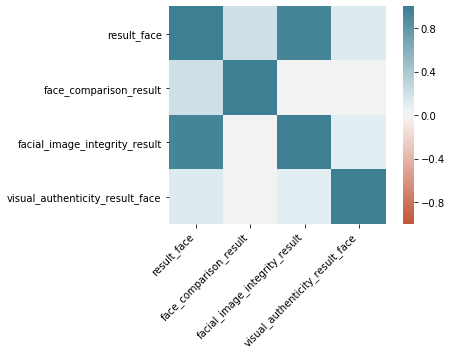

In [31]:
plt.rcParams['figure.figsize'] = (6, 4)
corr = data[[ 'result_face',
       'face_comparison_result', 'facial_image_integrity_result',
       'visual_authenticity_result_face']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0, 0.5, 'Count')

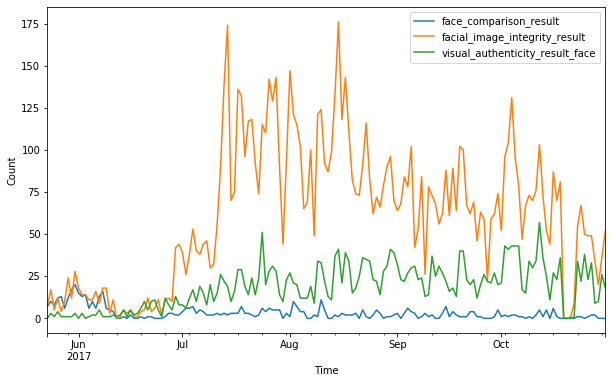

In [32]:
plt.rcParams['figure.figsize'] = (10, 6)
data.groupby(pd.Grouper(key='created_at_doc', freq='D'))[face_check_feature].sum().plot();

plt.xlabel("Time")
plt.ylabel("Count")

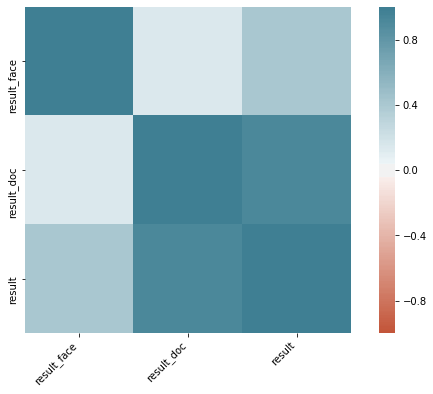

In [33]:
corr = data[[ 'result_face', 'result_doc', 'result']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [34]:
data.head()

,Unnamed: 0_doc,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,dummy,result,month,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57+00:00,0.0,0.0,0.0,0.0,0.0,0.0,050a0596de424fab83c433eaa18b3f8d,0.0,0.0,0,0.0,0.0,1.0,1,1,6,Male,IRL,passport,2019-08-12,IRL,NaT,NaN,NaN
1,1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04+00:00,0.0,0.0,0.0,0.0,0.0,0.0,f69c1e5f45a64e50a26740b9bfb978b7,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Female,NaN,driving_licence,2023-02-28,GBR,NaT,NaN,NaN
2,2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49+00:00,0.0,0.0,0.0,0.0,0.0,0.0,f9f84f3055714d8e8f7419dc984d1769,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,ITA,passport,2018-06-09,ITA,NaT,NaN,NaN
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38+00:00,0.0,0.0,0.0,0.0,0.0,0.0,10a54a1ecf794404be959e030f11fef6,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,NaN,national_identity_card,NaT,FRA,2007-08-01,NaN,NaN
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09+00:00,0.0,0.0,0.0,0.0,0.0,0.0,1f320d1d07de493292b7e0d5ebfb1cb9,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,POL,national_identity_card,2019-05-29,POL,NaT,NaN,NaN


# 3) Document expiration date

In [35]:
data['created_at_doc'] = data['created_at_doc'].dt.tz_convert(None)

data['expired_document'] = data['date_of_expiry'] <= data['created_at_doc']

In [36]:
data.result.value_counts()

0    126889
1     49513
Name: result, dtype: int64

In [37]:
data[data['result'] == 1]['expired_document'].value_counts()

False    48495
True      1018
Name: expired_document, dtype: int64

In [38]:
check = data[data['result'] == 0]
check = check[check['expired_document'] == True]

In [39]:
check

,Unnamed: 0_doc,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,dummy,result,month,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version,expired_document
694,694,3dc5925647a646b9966bf2d40804feee,0,0.0,0.0,0.0,0.0,2017-06-14 17:19:38,0.0,0.0,0.0,0.0,0.0,0.0,5d210c4fb12040b59ac67400860517f2,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,NaN,passport,2017-02-07,IRL,NaT,NaN,NaN,True
3525,4049,f8e4ff26fc0c483c93230d5ccc0720ae,0,0.0,0.0,0.0,0.0,2017-10-30 23:01:41,0.0,0.0,0.0,0.0,0.0,0.0,12f5f5db06814568bf90fd60104e6be9,0.0,0.0,0,0.0,0.0,0.0,1,0,10,NaN,NaN,driving_licence,2013-09-25,PRT,NaT,NaN,NaN,True
21090,22319,8322a795e84644df8f8f6a767fc3e087,0,0.0,0.0,0.0,0.0,2017-07-06 09:38:38,0.0,0.0,0.0,0.0,0.0,0.0,260f93c608a94037b46c425048d81d6a,0.0,0.0,0,0.0,0.0,0.0,1,0,7,NaN,NaN,driving_licence,2017-03-25,IRL,NaT,NaN,NaN,True
24824,26116,14d795244ca848608be68814a88217de,0,0.0,0.0,0.0,0.0,2017-05-31 19:30:24,0.0,0.0,0.0,0.0,0.0,0.0,19471e206d7243468359b49c6c08e804,0.0,0.0,0,0.0,0.0,0.0,1,0,5,Male,NaN,national_identity_card,2017-03-12,PRT,NaT,NaN,NaN,True
31416,32805,ae43bfb085fe48e4afee9c230f3c937e,0,0.0,0.0,0.0,0.0,2017-07-03 07:12:59,0.0,0.0,0.0,0.0,0.0,0.0,e04a55bd498e40e085c9681997aae232,0.0,0.0,0,0.0,0.0,0.0,1,0,7,NaN,NaN,driving_licence,2009-09-29,POL,NaT,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176244,181832,38c8241c91c34ba6bdad9b9fe36db50f,0,0.0,0.0,0.0,0.0,2017-06-21 15:36:38,0.0,0.0,0.0,0.0,0.0,0.0,5ac68fc736af44198047652ebdb836f8,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,SVN,national_identity_card,2016-07-31,SVN,NaT,NaN,NaN,True
176264,181852,f983097304204c49b498d9961b940be9,0,0.0,0.0,0.0,0.0,2017-06-21 16:25:09,0.0,0.0,0.0,0.0,0.0,0.0,b9b85ece2c484b09a4c5b8c7e909a496,0.0,0.0,0,0.0,0.0,0.0,1,0,6,Male,LTU,national_identity_card,2017-06-08,LTU,NaT,NaN,NaN,True
176300,181888,d8a7adca5d6948cf9dc8726fac86810a,0,0.0,0.0,0.0,0.0,2017-06-21 17:41:29,0.0,0.0,0.0,0.0,0.0,0.0,64c82dad35554463987323585384078e,0.0,0.0,0,0.0,0.0,0.0,1,0,6,NaN,DEU,national_identity_card,2017-06-19,DEU,NaT,NaN,NaN,True
176304,181892,d2f469ec2eeb4490a81baaf44730d91d,0,0.0,0.0,0.0,0.0,2017-06-21 17:42:38,0.0,0.0,0.0,0.0,0.0,0.0,97bfcb64ae9049fda09d8f03e33d1b98,0.0,0.0,0,0.0,0.0,0.0,1,0,6,NaN,DEU,national_identity_card,2017-06-19,DEU,NaT,NaN,NaN,True


## 4) Number of attempts

Text(0, 0.5, 'Count')

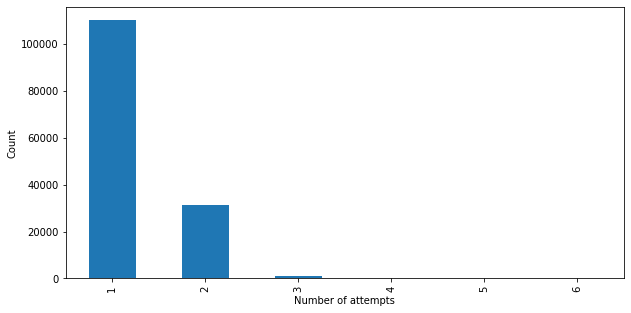

In [54]:
plt.rcParams['figure.figsize'] = (10,5)
attempts = data.groupby(['user_id_doc'])['attempt_id'].count().reset_index(name='count')
attempts.groupby(['count'])['user_id_doc'].count()[:10].plot(kind='bar');

plt.xlabel("Number of attempts")
plt.ylabel("Count")

In [44]:
attempts.groupby(['count'])['user_id_doc'].count()

count
1    110372
2     31118
3      1145
4        78
5         7
6         2
Name: user_id_doc, dtype: int64